In [1]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"
    
from checkpoint_evaluacion_modelos import *

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# <h1><center><ins>EVALUACIÓN DE MODELOS EN PROBLEMAS DE CLASIFICACIÓN</ins></center></h1>
<h1><center>Práctica guiada:</center></h1>
<img src="img/01_Ev_Modelos_caratula.jpeg" alt="Drawing" style="width: 300px;"/>

<a id="tabla_contenidos"></a> 
## Tabla de Contenidos

### <a href='#section_objetivos'>0. Objetivos de la Notebook</a>


### <a href='#section_repaso'>1. Introducción</a>
- #### <a href='#section_reg_vs_clas'>1.1 Regresión vs. Clasificación</a>
- #### <a href='#section_outcomes'>1.2 Outcomes de una clasificación</a>
- #### <a href='#section_matriz_confusion'>1.3 Matriz de confusión</a>


### <a href='#section_metricas'>2. Métricas de evaluación</a>
- #### <a href='#section_caso'>2.1 Presentación del caso</a>
- #### <a href='#section_modelo'>2.2 Entrenamos y aplicamos el modelo</a>
- #### <a href='#section_matriz_confusion_code'>2.3 Métricas: Matriz de confusión</a>
- #### <a href='#section_accuracy'>2.4 Métricas: Accuracy</a>
- #### <a href='#section_error'>2.5 Métricas: Error de Clasificación</a>
- #### <a href='#section_recall'>2.6 Métricas: Sensitivity (o recall)</a>
- #### <a href='#section_specificity'>2.7 Métricas: Specificity</a>
- #### <a href='#section_precision'>2.8 Métricas: Precision</a>
- #### <a href='#section_fpr'>2.9 Métricas: False positive rate (FPR)</a>
- #### <a href='#section_f1_score'>2.10 Métricas: F1-Score</a>


### <a href='#section_curva_roc'>3. Curva ROC</a>
- #### <a href='#section_umbrales'>3.1 Ajustando los umbrales</a>
- #### <a href='#section_croc'>3.2 Introducción Curva ROC y AUC</a>
- #### <a href='#section_imp_croc'>3.3 Implementación Curva ROC y AUC</a>


### <a href='#4.'>4. Comentarios finales</a>
---

<a id="section_objetivos"></a> 
## 0. Objetivos de la Notebook

<div id="caja11" style="float:left;width: 100%;">
  <div style="float:left;width: 9%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;">
      <label>Explorar métricas de evaluación de modelos de clasificación.</label>
  <div style="float:left;width: 85%;">
      <label>Aplicación de estas métricas con la librería:</label>    
      <a class="reference internal" href=https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics><b><code>scikit-learn</code></b></a><ul>     
</div>    
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_repaso"></a> 
## 1. Introducción

<a id="section_reg_vs_clas"></a> 
### 1.1 Regresión vs. Clasificación

En el **Modulo 2** utilizamos métricas de [`scikit-learn`](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) para evaluar problemas de **REGRESIÓN**: situaciones en las que el **valor a predecir pertenece a una variable continua** (por ejemplo, evalúamos cuán bueno era un modelo que predecía el valor por metro cuadrado de una propiedad utilizando features tales como el tipo de propiedad, su ubicación, la cantidad de habitaciones, y los amenities con los que contaba, entre otras características de un inmueble).


En los problemas de **CLASIFICACIÓN**, en cambio, el objetivo es **predecir la pertenencia o la probabilidad de pertenencia** de un caso a una clase. <br><br><br><br><br><br><br><br><br>
<img src="img/02_regression_vs_classification.png" alt="Drawing" style="width: 500px;"/>


<a id="section_outcomes"></a> 
### 1.2 Outcomes de una clasificación

Los outcomes en una clasificación se pueden dividir en cuatro clases:
- **Falsos positivos (FP):** es una clase negativa que fue clasificada como positiva. Tomando el caso anterior de la temperatura, en el cual nuestra clase positiva es predecir si determinado día va a estar caluroso, **FP** sería predecir que va a ser calor, pero luego ese día hace frío. 
- **Falsos negativas (FN):** es una clase positiva que fue clasificada como negativa. En nuestro ejemplo, un **FN** sería predecir que va a ser frío y que luego haga calor. 
- **Verdaderos positivos (TP):** es una clase positiva clasificada correctamente. En nuestro caso, sería predecir que un día va a hacer calor, y luego realmente hace calor ese día. 
- **Verdaderos negativos (TN):** es una clase negativa clasificada correctamente. En nuestro caso, sería predecir que un día va a hacer frío, y luego realmente hace frío ese día. 

Recuerden que la noción de **"positivo"** (asociada al calor en nuestro ejemplo) o **"negativo"** (asociada al frío) son arbitrarias y podrían ser intercambiables en función de cuál sea el problema con el que nos enfrentamos y nuestro interés (si quisiérams saber qué días en el año serían ideales para usar la pileta, es probable que la clase **positiva** esté asociada al calor; lo contrario sucedería si quisiésemos elegir días para patinar sobre hielo.)

<a id="section_matriz_confusion"></a> 
### 1.3 Matriz de confusión

La **Matriz de confusión** es una tabla de doble entrada donde se describen los **resultados observados** (por ejemplo, el registro real si hizo frío o calor determinado día) **vs. resultados predichos** (las predicciones que hicimos sobre dichos días a partir de nuestro modelo). 

Nos permite discernir entre los casos **bien clasificados** y aquellos que fueron **erróneamente clasificados** por el modelo.

A partir de la **Matriz de confusión** podemos construir las **outcomes** de la clasificación (**TP**, **TN**, **FP**, y **FN**).<br><br><br><br><br><br><br><br><br>
<img src="img/03_confusion_matriz.png" alt="Drawing" style="width: 500px;"/>

Además, a partir de la **Matriz de confusión** podemos derivar las **distintas métricas** que nos vas a permitir evaluar los modelos de clasificación (siendo que cada una de ellas hace foco en distintos cuadrantes de la matriz de confusión). <br><br><br><br><br><br><br><br><br>
<img src="img/04_metrics.png" alt="Drawing" style="width: 500px;"/>

En la **próxima sección**, a partir de un problema de clasificación, veremos cómo calcular cada una de ellas (no a mano, sino usando a nuestra librería amiga [`scikit-learn`](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)) y qué es lo que cada una nos brinda como información útil para interpretar nuestros resultados y tomar decisiones al respecto:

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [2]:
# Ejecutá esta celda...
test_1()


La matriz de confusión muestra:



RadioButtons(layout=Layout(width='100%'), options=('Los resultados observados vs. los predichos por un modelo.…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_metricas"></a> 
## 2. Métricas de evaluación

<a id="section_caso"></a> 
### 2.1 Presentación del caso

El **objetivo** de esta sección es analizar en la práctica las **medidas de evaluación para modelos de clasificación** mencionadas. Para ello trabajaremos tratando de **predecir la probabilidad de que un empleado deje una empresa**. Disponemos de un dataset que contiene los siguientes campos:
1. Última evaluación
2. Cantidad de proyectos en los que trabajó
3. Promedio de horas mensuales trabajadas
4. Tiempo en la compañía
5. Si sufrió un accidente de trabajo
6. Si tuvo una promoción en el último año
7. Nivel salarial

El objetivo, entonces, es **predecir la probabilidad** de que $P(left=1 | X)$. Nos enfrentamos a un problema que va a tener dos clases que arbitrariamente vamos a etiquetar como **positiva** refiriéndonos a la persona que deja la empresa y **negativa** como la persona que permanece<br><br><br><br><br><br><br><br><br>
<img src="img/01_tow_labels.png" alt="Drawing" style="width: 500px;"/>


Para empezar, importamos las librerías que hemos visto en módulos pasados y cargamos el dataset

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../Data/HR_comma_sep.csv')
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
12953,0.55,0.87,3,201,2,0,0,0,technical,medium
9395,0.73,0.69,6,273,4,1,0,0,marketing,medium
8077,0.67,0.86,3,175,3,0,0,0,IT,low
13816,0.89,0.96,3,179,8,0,0,0,management,high
7633,0.60,0.77,3,202,3,0,0,0,sales,low
7438,0.52,0.70,4,219,3,0,0,0,hr,medium
6310,0.67,0.54,3,213,4,0,0,0,support,low
10018,0.77,0.70,4,232,3,0,0,0,sales,medium
13025,0.88,0.61,4,177,4,1,0,0,support,low
14059,0.82,0.69,3,250,3,0,0,0,accounting,low


<a id="section_modelo"></a> 
### 2.2 Entrenamos y aplicamos el modelo

Utilizamos una [`LogisticRegession`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) junto con otras herramientas de la librería **scikit-learn** para preparar los datos, instanciar el modelo, entrenarlo y aplicarlo: [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) y [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Armamos la matriz de predictores ($X$) y el target ($y$)

In [5]:
train_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
              'time_spend_company', 'Work_accident', 'promotion_last_5years']
X = df[train_cols]
y = df['left']

Hacemos el split entre train y test:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Utilizamos sklearn para standarizar la matriz de Features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>HINT para no olvidar:</b> recuerden que siempre que estamos aplicando transformaciones sobre nuestros datos que dependen de estos (como la normalización), las transformaciones se entrenan con los datos de <b>train</b> sin incluir los de <b>test</b>, y sobre estos últimos se aplica la transformación ya entrenada. Por eso usamos <code>scaler.fit_transform(X_train)</code> para <b>train</b> pero sólo el método <code>scaler.transform(X_test)</code> para <b>test</b></label></div>
</div>

Instanciamos una Regresión Logística (podríamos haber utilizado otros modelos, pero la idea es mantener el problema simple y concentrarnos en entender cómo se evalúan los modelos)

In [8]:
clf = LogisticRegression(C=1e10)

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>HINT para no olvidar:</b> ¿Qué significa el argumento <b>C</b> en la:<a class="reference internal" href=https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html><b><code>LogisticRegession</code>?</b></a>
   <div style="float:left;width: 85%;"><label>Revisá la documentación para recordar por qué le estamos pasando como argmento un número tan grande (pista: tiene algo que ver con el tema de Regularización)<label>

Entrenamos y aplicamos nuestro modelo sobre datos de test

In [9]:
clf.fit(X_train, y_train)

LogisticRegression(C=10000000000.0)

<img src="img/05_warning.png" alt="Drawing" style="width: 350px;"/>

**_¿Warning...? Keep Calm and Code On_** (but check carefully to understand what is going on): 

Como ya hemos visto en los módulos pasados, los [`Warning messages`](https://docs.python.org/3/library/warnings.html) nos alertan sobre situaciones respecto de la herramienta que estamos usando pero que, en general, no implican que nuestro código haya fallado. Estos mensajes suelen advertir, como en este caso, de cambios que se van a producir en próximas versiones de la librería y que sí van a impactar en el funcionamiento de nuestro código. 

En este caso, el **warning** se silencia indicando explícitamente el **solver** de la regresión logística cuando instanciamos el modelo:  `clf = LogisticRegression(C=1e10, solver='lbfgs')`. Si no te apareció ningún warning, entonces... **_Keep Calm and Code On_**.

In [10]:
y_pred = clf.predict(X_test)

Ahora que tenemos las predicciones realizadas por nuestro modelo, pasemos a ver cómo nos fue utilizando las distintas métricas para evaluar los resultados de un modelo de clasificación!
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/06_predicciones2.png" alt="Drawing" style="width: 500px;"/>


<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_matriz_confusion_code"></a> 
### 2.3 Métricas: Matriz de confusión

Antes de estimar las distintas métricas, vamos a ver cómo generar la **Matriz de confusión** con **sklearn**.<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/03_confusion_matriz_aux.png" alt="Drawing" style="width: 500px;"/>


**Documentación:** [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) .

**Y un ejemplo de su uso:** https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html .

Básicamente, como mencionamos anteriormente, la **Matriz de confusión** es una tabla de contingencia que tabula la distribución de los casos analizados en función de su **valor real ("observado)** y su **valor estimado por el modelo ("predicho")**.

En `confusion_matrix` es importante recordar que el primer argumento corresponde a los **valores observados** y el segundo a los **valores predichos**.

Importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix), y lo aplicamos:

In [11]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[3464  305]
 [ 898  283]]


**¿Cómo se lee esto?** : En las filas están representados los datos observados (`y_test`). En las columnas se representan los datos predichos por el modelo (`y_pred`).

Si recordamos qué significaba cada uno de los cuadrantes de la **matriz de confusión**: <br><br><br><br><br><br><br><br><br>
<img src="img/03_confusion_matriz.png" alt="Drawing" style="width: 300px;"/>

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [12]:
# Ejecutá esta celda...
test_2()


¿Cuántos True Positive (TP) obtuvimos con nuestro modelo?



RadioButtons(layout=Layout(width='100%'), options=('3464', '283', '305', '898'), value='3464')

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

La **matriz de confusión** nos está aportando la siguiente información: 
* **True Positives (TP):** hemos predicho correctamente que el empleado se va (clase positiva, 1) **(283)**
* **True Negatives (TN):** hemos predicho correctamente que el empleado se queda (clase negativa, 0) **(3464)**
* **False Positives (FP):** hemos predicho que el empleado se iba pero se queda **(305)**
* **False Negatives (FN):** hemos predicho que el empleado se queda pero se va **(898)**

Con estos valores podríamos computar las distintas métricas para evaluar el modelo como vimos en las fórmulas de la **sección 1.3**, pero en su lugar vamos a utilizar directamente las herramientas que nos provee `sklearn`.

Por ahora vamos a asignarle variable a la matriz de confusión para algunos cálculos que haremos más adelante (en los que `sklearn`) no nos va a ayudar.

In [13]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_accuracy"></a> 
### 2.4 Métricas: Accuracy

El **Accuracy** de los datos de **test** se calcula como la proporción de casos correctamente clasificados de los datos de **test** sobre el total de casos de **test**.<br><br><br><br><br><br><br><br><br>
<img src="img/06_accuracy.png" alt="Drawing" style="width: 500px;"/>

**Documentación:** [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

**Y un ejemplo de su uso:** https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score .

En `accuracy_score` el primer argumento corresponde a los **valores observados** y el segundo a los **valores predichos**.

Importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), y lo aplicamos:

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test, y_pred))

Accuracy= 0.756969696969697


**¿Qué significa esto?** : este caso, encontramos que el **76% (aprox.)** de los casos —en el **test set**— han sido correctamente clasificados.

Ahora bien, ¿qué tan bueno es este clasificador? ¿Qué significa que podamos clasificar correctamente a esta proporción de casos?

Una primera forma de comenzar a responder esta pregunta es comparar la performance con un clasificador bien simple y (casi) trivial: se lo suele llamar **"clasificador nulo"** y consiste simplemente en predecir solamente teniendo en cuenta la clase más frecuente.

In [15]:
y_test.value_counts(normalize=True)

0    0.761414
1    0.238586
Name: left, dtype: float64

In [16]:
y_test.mean()

0.2385858585858586

En este caso, el **24%** de los casos en el **test** **set** son 1, es decir que se irán de la empresa. Por ende, la proporción de 0 (es decir casos que no sevan de la empresa), la podemos calcular de la siguiente manera: 

In [17]:
1.0 - y_test.mean()

0.7614141414141414

**¿Qué significa esto?** Esto significa que si usáramos un modelo simple en el que para **todos los casos** de los **datos de test** utilizáramos la etiqueta de la clase mayoritaria, nuestro **accuracy** sería de **76%**. En este caso, estaríamos prediciendo bien todos los casos negativos (es decir, los que se quedan en la empresa) pero estaríamos errando en los casos positivos (todos los que se van de la empresa). 

Y si comparamos el resultado que obtendríamos con este **modelo simple**, nos damos cuenta que, aunque en un primer momento el resultado de nuestro **modelo de regresión logística** parecía muy bueno (**76%**), no es superior a un modelo **dummy** que se limita a etiquetar a todos los casos con la etiqueta de la clase mayoritaria: 

<img src="img/07_dummy_result.jpg" alt="Drawing" style="width: 300px;"/>

**Y en este caso, esto nos sucedió porque...** 

<img src="img/08_unbalancced_clasess.jpg" alt="Drawing" style="width: 300px;"/>


Los problemas de **clases desbalanceadas** son muy típicos en ciertos problemas tales como la detección de default financiero (donde un porcentaje bajo de las personas con créditos terminan no pagando sus cuotas... en general), la detección de spams, etc.

En estos problemas, el **accuracy** suele ser alto porque esta métrica hace foco tanto en la detección correcta de **TN** como de **TP**. Pero quizás nuestro problema de negocio requiere que nos concentremos más en la detección de los **TP** y no de los **TN**. Más adelante en el curso vamos a tener una clase especial para a aprender estrategias para resolver estos problemas de **clases desbalanceadas** y que los algoritmos que apliquemos no vayan por el camino más fácil de detectar la clase mayoritaria. 

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Take home message:</b> Antes de evaluar un modelo, chequear el desbalanceo de clases. Si las clases están muy desbalanceadas, es probable que el <b>accurracy</b> no sea una métrica confiable. Para eso entonces, vamos a ver a continuación otras métricas que nos van a informar mejor de cómo está funcionando este modelo.</label></div>
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_error"></a> 
### 2.5 Métricas: Error de Clasificación

Es, básicamente, el complemento del accuracy. Cuantifica el error total comentido por el clasificador. No tenemos un constructor de sklearn, sino que lo podemos estimar "a mano"<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/07_error rate.png" alt="Drawing" style="width: 500px;"/>


In [18]:
print(1 - accuracy_score(y_test, y_pred))

0.24303030303030304


<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_recall"></a> 
### 2.6 Métricas: Sensitivity (o recall)

**Sensitivity** o **recall** o **true positive rate (TPR)** mide la capacidad (qué tan "sensible" es) del modelo de detectar los **verdaderos positivos (TP)** sobre todos los casos que son positivos **(FN+TP o todos los positivos)**. En nuestro ejemplo, del total de personas que se van, sería evaluar cuántas logra identificar correctamente el modelo.<br><br><br><br><br><br><br><br><br>
<img src="img/08_sensitivity.png" alt="Drawing" style="width: 500px;"/>

**Documentación:** [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).

**Y un ejemplo de su uso:** https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py .

En `recall_score` el primer argumento corresponde a los **valores observados** y el segundo a los **valores predichos**.


Importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), y lo aplicamos:

In [19]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.23962743437764605


**¿Qué significa esto?** Que nuestro modelo está teniendo un bajo rendimiento en detectar a las personas que se van en relación a las que realmente se van de la empresa. Podríamos pensar que de cada 100 personas que se van, nuestro modelo tan sólo detectará 23 y el resto las clasificará como personas que se quedan. 

Comparado con el **accuracy_score**, esta medida nos da una mejor idea de cómo está funcionando nuestro modelo en relación al interés de nuestro negocio, y no va a estar afectada por los problemas de desbalanceo de clases.

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_specificity"></a> 
### 2.7 Métricas: Specificity

**Specificity** o **true negative rate (TNR)** mide la capacidad de detectar los **"verdaderos negativos (TN)** sobre el total de casos que son negativos **(TN+FP)**. Es decir, nos da información sobre qué tan específico o selectivo es el modelo al predecir las instancias positivas.<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/09_specificity.png" alt="Drawing" style="width: 500px;"/>

Esta métrica no la podemos calcular con herramientas de sklearn, así que tenemos que hacerlo "a mano"

In [20]:
specificity = TN / (TN + FP)

print(specificity)

0.9190766781639692


**¿Qué significa esto?** Esto significa que nuesto modelo es muy específico, es decir que cometió pocos errores de falsos positivos (es decir que pocas veces dijo que un empleado se iba a ir, cuando en realidad ese empleado no se fue de la compañía).

**Specificity** o **TNR** puede ser importante, por ejemplo, en el contexto en el que estamos evaluando administrar una droga con fuertes efectos secundarios a una población de potenciales pacientes y, en ese caso, queremos evitar cometer errores en los que le administremos la droga a alguien que **NO** es un paciente. En ese escenario, queremos que nuestro modelo sea muy **específico**.

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Tener en cuenta que:</b> priorizar modelos con <b>mayor especificidad</b>, puede generar <b>una pérdida en la sensibilidad</b> (es decir, mientras más seguro quiero estar en que selecciono solamente los que son pacientes, puede ser que más pacientes los identifique como personas sanas). Lo contrario ocurre si se promueve el escenario inverso.</label></div>
</div> 

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_precision"></a> 
### 2.8 Métricas: Precision

**Precision** o **positive predictive value (PPV)** mide qué tan **"preciso"** es el clasificador al predecir las instancias positivas. Es decir, cuando el clasificador predice un valor positivo..., ¿qué tan frecuentemente es correcta esta predicción?

Se calcula como el número de **predicciones correctas** sobre el **número total de predicciones**<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/10_precision.png" alt="Drawing" style="width: 500px;"/>


Esta métrica nos permite evaluar el peso de los **Falsos Positivos (FP)**

**Documentación:** [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

**Y un ejemplo de su uso:** https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py .

En `precision_score` el primer argumento corresponde a los **valores observados** y el segundo a los **valores predichos**. 

Importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), y lo aplicamos:

In [21]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.4812925170068027


<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Tener en cuenta que:</b> aunque parecen lo mismo <b>especificidad</b> y <b>pecisión</b> son muy distintos. Aunque en ambos están pesando los <b>falsos positivos (FP)</b>,en la <b>especificidad</b> evaluamos los errores que cometemos en relación a los <b>TN</b> (que en nuestro ejemplo es muy alto, 0.91), mientras que con la <b>precisión</b> evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir de la empresa, con lo que estamos evaluando los errores en relación al <b>TP</b> (y en nuestro caso no somos muy buenos porque sólo en la mitad de las veces que nuestro modelo dice que la persona se va a ir de la empresa, realmente eso sucede)</label></div>
</div> 

**¿Qué significa esto?** Que nuestro modelo no es muy preciso. De cada 100 predicciones positivas que realiza el modelo (es decir, predice que un empleados se va a ir de la compañía), sólo en 48 acierta.

Dependiendo del problema de negocio que estemos evaluando, quizás nuestro objetivo sea tener una precisión muy alta. Es decir, que de cada 100 predicciones positivas, la mayoría sean verdaderas y cometamos un bajo porcentaje de **falsos positivos (FP)**.

<br>
<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label><b>Tener en cuenta que:</b> aunque parecen lo mismo <b>especificidad</b> y <b>pecisión</b> son muy distintos. Aunque en ambos están pesando los <b>falsos positivos (FP)</b>,en la <b>especificidad</b> evaluamos los errores que cometemos en relación a los <b>TN</b> (que en nuestro ejemplo es muy alto, 0.91), mientras que con la <b>precisión</b> evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir de la empresa, con lo que estamos evaluando los errores en relación al <b>TP</b> (y en nuestro caso no somos muy buenos porque sólo en la mitad de las veces que nuestro modelo dice que la persona se va a ir de la empresa, realmente eso sucede)</label></div>
</div> <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/11_presicion.png" alt="Drawing" style="width: 400px;"/>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Además, ahora sabemos que **no es lo mismo** ser **preciso** que tener buen **accuracy**:
<img src="img/14_accuracy_vs_precise.jpg" alt="Drawing" style="width: 400px;"/>

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [22]:
# Ejecutá esta celda...
test_3()


TP/(TP+FP) es la fórmula de:



RadioButtons(layout=Layout(width='100%'), options=('Specificity', 'Recall', 'Precision', 'Sensitivity'), value…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_fpr"></a> 
### 2.9 Métricas: False positive rate (FPR)

**False positive rate (FPR)** se calcula como el númoer de clases incorrectas predichas, sobre el total de clases negativas. 
<br><br><br><br><br><br><br><br><br>
<img src="img/12_false_positive_rate.png" alt="Drawing" style="width: 500px;"/>


El mejor **FPR** es 0, mientras que el peor es 1. 

Se calcula como `1-specificity`

In [23]:
print(1-specificity)

0.08092332183603079


**¿Qué significa esto?** Este valor es el complemento de la especificidad, así que su interpretación es también el complement. En este caso nos está indicand cuántos errores cometió de falsos positivos (es decir que pocas veces dijo que un empleado se iba a ir, cuando en realidad ese empleado no se fue de la compañía).

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_f1_score"></a> 
### 2.10 Métricas: F1-Score

Es un promedio armónico entre precision y recall.<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/14_f1_score.png" alt="Drawing" style="width: 500px;"/>

La ventaja de usar la media armónica (en vez de la media aritmética), es que, como se observa en la figura anterior, el resultado del f1-score no es sensible a valores altos de una de las dos variables (**recall** o **precision**). Por otro lado, no todos los valores extremos son ignorados, ya que los que son muy bajos si tienen peso en el resultado final. 

Es decir que para tener un `f1-score` alto, es necesario que tanto el **recall** como la **precision** sean altas, mientras que un `f1-score` bajo puede ser el resultado de un valor bajo en por lo menos una de estas métricas o en ambas a la vez.

**Documentación:** [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

**Y un ejemplo de su uso:** https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py .

En `f1_score` el primer argumento corresponde a los **valores observados** y el segundo a los **valores predichos**. 

Importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), y lo aplicamos:

In [24]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.3199547767100056


**¿Qué significa esto?** En este caso nuestro modelo tiene un bajo valor de `f1_score` porque tanto el recall como la precision tienen valores bajos. Es decir, que ni es bueno identificando las clases positivas, ni tampoco es preciso aciéndolo.

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_curva_roc"></a> 
## 3. Curva ROC

<a id="section_umbrales"></a> 
### 3.1 Ajustando los umbrales

Hasta ahora hemos trabajado con el resultado de las predicciones nos indique la pertenencia o no a una clase. Así nuestro resultado `y_pred` contiene valores 0 (se queda en la empresa) ó 1 (se va de la empresa)

Si pasamos `y_pred` a Serie, podemos usar los métodos `.unique()` o `.value_counts()` para ver los elementos que tiene y corroborar la afirmación anterior.

In [25]:
pd.Series(y_pred).unique()

array([0, 1], dtype=int64)

In [26]:
pd.Series(y_pred).value_counts()

0    4362
1     588
dtype: int64

Ahora bien, también podemos obtener como output de nuestro modelo un **valor de probabilidad de pertenencia a una clase**. Es decir, en vez de tener valores 0 ó 1, como en nuestro caso, vamos a tener valores que van a ir de 0 a 1 y que, mientras más cerca de 0 nos van a indicar que es más probable que pertenezca a la clase negativa, y mientras más cerca de 1 nos va a indicar que ese caso está cerca de la clase positiva. 

Para acceder a estos valores de probablidad, tenemos que utilizar el método [`.predict_proba()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) del modelo. 

Probemos utilizar el método `.predict_proba()` y observemos el tipo de output que nos devuelve

In [27]:
y_pred_proba = clf.predict_proba(X_test)

In [28]:
display(y_pred_proba.shape, y_pred_proba)

(4950, 2)

array([[0.96331465, 0.03668535],
       [0.93112557, 0.06887443],
       [0.81267004, 0.18732996],
       ...,
       [0.93393752, 0.06606248],
       [0.78978989, 0.21021011],
       [0.28266618, 0.71733382]])

**¿Qué pasó con nuestras predicciones?** Vamos paso a paso: 
- El método `.predict_proba()` nos devuelve una array en el cual aparecen dos probabilidades de cada instancia del test set: $p(y=0)$ y $p(y=1)$, en ese orden.
- Ahora el output de nuestras predicciones tiene 2 columnas. La primera columna refiere a la probabilidad de un caso de pertenecer a la clase 0 (negativa), mientras que la segunda columna refiere a la probabilidad de un caso de pertenecer a la clase 1 (positiva). 
- En nuestro ejemplo, en el primer caso, la primera columna tiene un valor de 0.96, lo que significa que el modelo estimo con una probabilidad muy alta su pertenencia a la clase negativa (es decir, está muy seguro de que es 0). 
- Fijensé que en nuestro ejemplo, el último caso sería lo opuesto, ya que tiene un valor de probabilidad muy alto en la segunda columna, que se asocia a la clase 1. 
- Es decir, que el `.predict_proba()` nos va a dar como output un array que va a tener tantas filas como casos y tantas columnas como etiquetas de las que tenga que estimar su probabolidad de pertenenecia. 
- Dado que en nuestro ejemplo estamos abordando un problema binario, la información de una sóla columna nos permite deducir la probabilidad de la otra (es decir que conociendo la probabilidad asociada a una clase, podemos conocer el de la otra). 

Cuando utilizamos el método `.predict` con nuestros modelos, lo que está ocurriendo es que se está asumiendo que si $p(y=1) > 0.5$, entonces, la predicción del modelo será que $y=1$. Fijémonos qué sucede si aplicamos este threshold a nuestros datos de probablidad

Nos quedamos con una de las columnas, ya que al ser una clasificación binaria, la información de una nos permite deducir la información de la otra. 

Luego de quedarnos con esa columna, generamos un booleano que ponga True cuando los valores sean mayores a 0.5 (el umbral por default que usan los modelos en sklearn) y False cuando sean menores. 

Finalmente, pasamos ese booleano a valores de 0 ó 1, y chequeamos que obtenemos la misma distribución que con los resultados originales.

In [29]:
# Pertenencia a partir de las probabilidades
pd.Series(y_pred_proba[:,1]>0.5).astype(int).value_counts()

0    4362
1     588
dtype: int64

In [30]:
# Pertenencia calculada a partir del método .predict()
pd.Series(y_pred).value_counts()

0    4362
1     588
dtype: int64

Y si comparamos una serie contra la otra, encontramos que son idénticas ya que en todos los casos obtenemos **True**

In [31]:
all(pd.Series(y_pred_proba[:,1]>0.5).astype(int)==pd.Series(y_pred))

True

Hagamos ahora una **distribución de las probabilidades** para inspeccionar un poco más en detalle los resultados que nos provee `.predict_proba()`

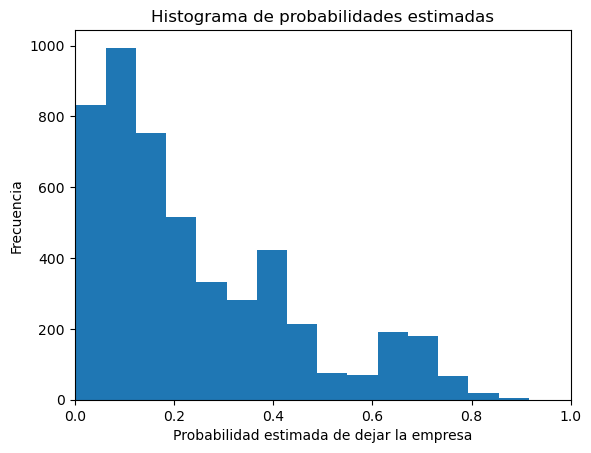

In [32]:
# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de dejar la empresa')
plt.ylabel('Frecuencia')
plt.show()

**¿Qué tenemos aquí?**
- La gran mayoría de las probabilidades predichas van de 0.0 a 0.4
- Hay un escaso número de probabilidades estimadas mayores a 0.5 (es decir, de empleados que se van)
- En consecuencia, la mayor parte de los casos van a ser predichos como $y=0$ es decir, que no se van de la empresa.

**¿Y para qué nos sirve conocer esto?**
- Dependiendo de nuestro objetivo y de la lógica del negocio, podemos querer modificar este umbral para que, por ejemplo, sea menos riguroso y así identifique como empleados que se van a ir a casos que estén por arriba de 0.4. Esto quizás aumenta la cantidad de **TRUE POSITIVES** (y por lo tanto de nuestro **recall** o **sensibilidad**). Es decir, el clasificador será más **"sensible"** a las instancias positivas
- Peeeeeeeero..., esto también nos hace cometer más errores de **FALSOS POSITIVOS** ya que quizás vamos a identificar casos como empleados que se van, cuando en realidad se quedan. Lo que va a afectar el **specificity** (y también la **precision**). 
- Movamos un poco el umbral (aunque no demasiado) para observar cómo cambia la matriz de confusión y ver si se cumple esto que estamos diciendo:

<img src="img/14_thresholds.jpg" alt="Drawing" style="width: 300px;"/>



Tenemos dos opciones para hacer las transformaciones con distintos thresholds. Podemos utilizar la función `binarize` del módulo **preprocessing** de **sklearn** (vean aquí [la documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)).

In [33]:
from sklearn.preprocessing import binarize
y_pred_logit = binarize(y_pred_proba, 0.3)[:,1]

C:\Users\USUARIO\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Otra opción, es genear un booleano y pasarlo a int (como hicimos arriba)

In [34]:
y_pred_logit = (y_probs_logit_left > 0.3).astype(int)
y_pred_logit

array([0, 0, 0, ..., 0, 0, 1])

Veamos ahora la **matriz de confusión original** y cómo cambia si usamos el threshold de 0.3: 

In [35]:
print('Matrix Original')
display(confusion_matrix(y_test,y_pred))
print('')
print('Nueva Matrix')
display(confusion_matrix(y_test,y_pred_logit))

Matrix Original


array([[3464,  305],
       [ 898,  283]], dtype=int64)


Nueva Matrix


array([[3046,  723],
       [ 358,  823]], dtype=int64)

A partir de la **Matrix de confusión** podemos ver cómo aumentaron los **TP** (pasaron de 283 a 823) peeeeero, también nos aumentaron los **FP** ya que pasaron de 305 a 723. 

Veamos cómo reflejan esto algunas de las métricas de evaluación que vimos antes:

**Sensitivity** o **recall**

In [36]:
print('Recall umbral 0.5=', recall_score(y_test, y_pred))
print('Recall umbral 0.3=', recall_score(y_test, y_pred_logit))

Recall umbral 0.5= 0.23962743437764605
Recall umbral 0.3= 0.6968670618120237


**Specificity**

(Dado que sklearn no nos brinda una función para calcular la specificidad, vamos a definir una función que nos permita estimarla rápidamente)

In [37]:
# definimos la función que va a tomar como argumentos los valores reales y los predichos
def specificy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return(specificity)

print('Spec umbral 0.5 =', specificy(y_test, y_pred))
print('Spec umbral 0.3 =', specificy(y_test, y_pred_logit))

Spec umbral 0.5 = 0.9190766781639692
Spec umbral 0.3 = 0.8081719288936058


**Accuracy**

In [38]:
print('Acc umbral 0.5 =', accuracy_score(y_test, y_pred))
print('Acc umbral 0.3 =', accuracy_score(y_test, y_pred_logit))

Acc umbral 0.5 = 0.756969696969697
Acc umbral 0.3 = 0.7816161616161617


<div id="caja7" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <br>  
  <div style="float:left;width: 85%;"><label><b>¿Qué podemos aprender de esto?</b></label></div>
</div>
<br>

- Se puede **ajustar el umbral** para las predicciones en **clasificadores binarios**.
- El ajuste de este umbral **repercute sobre las diferentes medidas de performance**.
- Particularmente, **sensitivity** y **specificity** tiene una relación inversa: siempre al mejorar uno, empeorará el otro
- En nuestro ejemplo, el **accuracy** no se vio demasiado afectado porque aunque ganamos en **TP**, perdimos en **TN** (ya que aumentó nuestra cantidad de **FP**). Dado que en el **accuracy** lo que importa es la cantidad de **TP**+**TN** sobre el total de casos, es lógico que si aumentamos uno pero bajamos el otro, esta métrica no cambie demasiado
- **¿Para qué nos sirve modificar los umbrales?** Ante ciertos problemas o lógicas de negocios, podemos querer cambiar el umbral de decisión de nuestro modelo para mejorar nuestra detección de casos positivos, a pesar de que aumentemos los negativos (Imagínense que estamos desarrollando una prueba muy sencilla para detectar demencias en adultos mayores cuyo objetivo es aplicarla masivamente y, en los casos que sean detectados como positivos, recomendarle a la persona que visite a un neurólogo. Aunque la recomendación va a tener un costo para la persona, nos va a interesar más que la medida sea muy sensible para que no se le "escapen" casos positivos, a riesgo de que personas sin problemas estén visitando al neurólogo. En este caso, es mejor generar un costo económico extra pero asegurarse que no están quedando pacientes sin identificar. 

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>    
  <div style="float:left;width: 85%;"><label><b>¿Se te ocurren otras situaciones en los que se podría modificar el umbral acorde a la lógica del negocio o problema?</b></label></div>
</div>

Y ahora vamos a ver otra medida para evaluar modelos que, en su base, genera distintos modelos a partir de mover los **umbrales de decisión** desde valores muy permisivos a valores muy exigentes. Nos referimos a la **CURVA ROC**

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_croc"></a> 
### 3.2 Introducción Curva ROC y AUC

La **Curva ROC** es un plot que nos permite evaluar en un modelo la relación entre dos métricas que vimos anteriormente: **specificity** (que también se calcula como $1-FPR$, tasa de falsos negativos) y **sensitivity** (o también denominada **recall** o $TPR$, tasa de verdaderos positivos). <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/15_roc_curve_1.png" alt="Drawing" style="width: 500px;"/>

La clave para realizar el plot de la **Curva ROC** es estimar la **specificity** y **sensitivity** de un modelo para distintos **umbrales de decisión** (recuerden lo que vimos en la sección anterior sobre cómo se ve afectado los resultados de un modelo cuando cambiamos este umbral)

Antes de probar con nuestros datos, veamos un ejemplo. Asumamos que hemos calculado **specificty** y **sensitivity** para cuatro matrices de confusión distintas que son el resultado de elegir 4 **umbrales de decisión** (de menos exigente a más exigente). Los **umbrales** que elegimos para este ejemplo serían: **1 (umbral 1)**, **0.50 (umbral 2)**, **0.75 (umbral 3)** y **0 (umbral 4)**. Fijensé que el **umbral 1** va a ser el más restrictivo, ya que lo que está indicando es que para que un caso sea considerado positivo su valor de probabilidad tendría que ser mayor que 1 (lo que es imposible, por lo que con ese umbral todos nuestros casos van a ser clasificados como negativos y nuestra **specificity** será máxima). Veamos cómo quedaría nuestra tabla para el modelo imaginario: <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<img src="img/16_curva_roc_2.JPG" alt="Drawing" style="width: 500px;"/>

Fijensé que la tabla ilustra muy bien cómo a medida que aumentamos el umbral y nos volvemos más flexibles ganamos **sensitivity** pero perdemos **specificity**. 

Utilizando la información de esta tabla podemos armar el plot de la **Curva ROC**. Para ello, vamos a ubicar cada uno de estos resultados en un gráfico cuyo **eje y** corresponderá a la **sensitivity** de cada umbral, mientras que el **eje x** corresponderá a la **FPR** o (**1-specificity**) de cada umbral (se usa la inversa de **specificity** para que los dos ejes del gráfico aumenten en forma positiva. Y para que se arme la **curva** vamos a unir esos puntos. Veamos cómo queda el plot: 
<br><br><br><br><br><br><br><br><br>
<img src="img/17_curve_roc_3.png" alt="Drawing" style="width: 300px;"/>

**¿Cómo interpretamos la Curva ROC?** Veamos ejemplos de cómo es la **Curva ROC** de distintos modelos para entender cuándo estamos ante un modelo que tiende a ser bueno y cuando random: 
<br><br><br><br><br><br><br><br><br>
<img src="img/18_curva_roc_4.png" alt="Drawing" style="width: 300px;"/>
Un ejemplo de cómo se vería un modelo **perfecto** (fijense que tiene el máximo de **sensitivitiy** y el máximo de **specificity**): 
<br><br><br><br><br><br><br><br><br>
<img src="img/19_curva_roc_.png" alt="Drawing" style="width: 300px;"/>
Los modelos que son **"buenos"** suelen estar entre la línea del **random** y del **perfect**. 

La **Curva ROC** nos permite visualmente comparar el desempeño de dos modelos en dos medidas que son claves como **sensitivity** y **specificity**. Aquel modelo que esté más cerca de la curva **perfecta** va a ser mejor que aquellos que estén más cerca de la línea de **random** (en el siguiente gráfico A > B): <br><br><br><br><br><br><br><br><br>
<img src="img/20_curva_roc_6.png" alt="Drawing" style="width: 300px;"/>


Por último, la **Curva ROC** nos permite estima el **Area bajo la curva (AUC por sus siglas en inglés, Area under the curve)**. El **AUC** intenta resumir en una sóla métrica la relación que muestra el gráfico entre **sensitivity** y **specificity** y así poder comparar modelos utilizando esa métrica: <br><br><br><br><br><br><br><br><br>
<img src="img/21_curva_roc_7.png" alt="Drawing" style="width: 300px;"/>
**CUIDADO** con el **AUC** porque dos modelos pueden tener un mismo **AUC** pero ser distintos si uno visualiza su **Curva ROC**:<br><br><br><br><br><br><br><br><br>
<img src="img/22_curva_roc_8.png" alt="Drawing" style="width: 300px;"/>

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [39]:
#Ejecutá esta celda...
test_4()


La CURVA ROC nos permite evaluar la relación entre:



RadioButtons(layout=Layout(width='100%'), options=('Recall y 1-specificity', 'Recall y sensitivity', 'Recall y…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_imp_croc"></a> 
### 3.3 Implementación Curva ROC y AUC

Veamos ahora cómo podemos estimar la **Curva ROC** y el **AUC** en nuestro modelo para detectar los empleados que se van a ir de la empresa. 

**¿Cómo plotear la Curva ROC?** Vamos a utilizar la función [`.roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) del módulo `metrics` de `sklearn`. Esta función nos va a calcular para distintos thesholds, el **FPR** (**1-specificity**) y el **TPR** (**sensitivity o recall**). Con estos valores vamos a poder hacer el gráfico de la curva:
- **Documentación:** [`.roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- **Un ejemplo de su uso:** [caso ejemplo](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)
- En `.roc_curve()` el primer argumento corresponde a los **valores observados** y el segundo a puede ser la **probabilidad de la clase positiva**
- Como **output** nos va a devolver (respetando el orden): **FPR**, **TPR**, **THRESHOLDS**.

Aplicamos `.roc_curve()`

In [40]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

Convertimos los valores en un objeto dataframe y graficamos la curva ROC

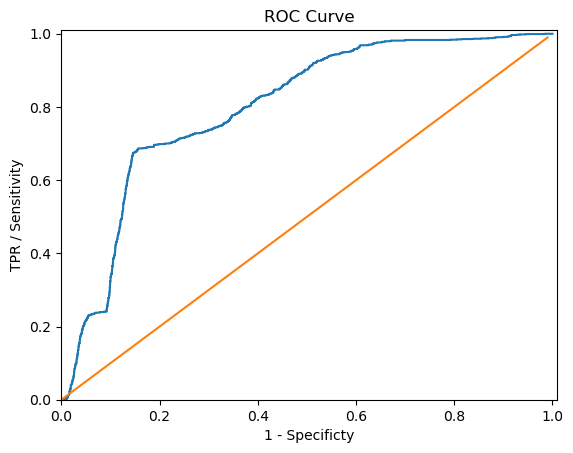

In [41]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

**¿Cómo estimamos la AUC?** Vamos a utilizar la función [`.auc()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) del módulo `metrics` de `sklearn`. Esta función nos va a calcular el **AUC** para un modelo a partir de los valores de **TPR** y **FPR**:
- **Documentación:** [`.auc()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)
- **Un ejemplo de su uso:** [caso ejemplo](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)
- En `.auc()` el primer argumento corresponde a los valores de **FPR** y el segundo a **TPR**
- Como **output** nos va a devolver el **AUC**.


Aplicamos `.auc()`

In [42]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.7999368258683243


Para terminar de ver la aplicabilidad de la `.roc_curve()` y `.auc()`, comparamos el modelo que teníamos con otro (clasificador Naïve Bayes):

In [43]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

In [44]:
nbc.fit(X_train, y_train)
y_preds_nb = nbc.predict(X_test)
y_probs_nb = nbc.predict_proba(X_test)

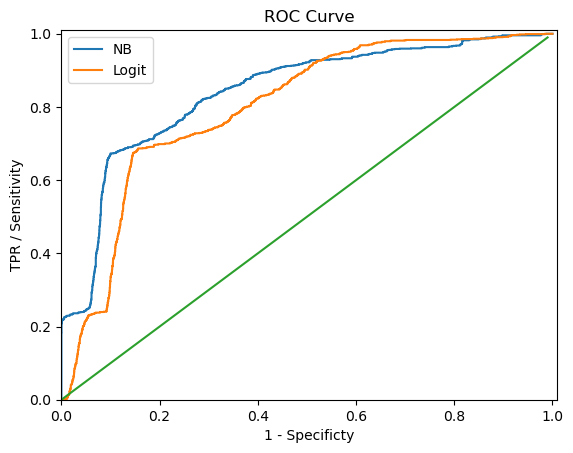

In [45]:
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs_nb[:,1])
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit'])
plt.show() 

In [46]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.8399519768762909
AUC-Logit= 0.7999368258683243


<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>    
  <div style="float:left;width: 85%;"><label><b>¿Cuál modelo es mejor?</b></label></div>
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="4."></a> 
## 4. Comentarios finales

<img src="img/23_conclusion.jpg" alt="Drawing" style="width: 400px;"/>

<div id="caja7" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/en_resumen.png" style="align:left"/> </div>
  <br>
  <br>  
  <div style="float:left;width: 85%;"><label><b>En conclusión...</b></label></div>
</div>
<br>

- En los **problemas de CLASIFICACIÓN** el objetivo es predecir la pertenencia o la probabilidad de pertenencia de un caso a una clase.


- Para estos problemas vamos a contar herramientas y métricas para **evaluar el desempeño del modelo** tales como: la **matriz de confusión**, el **accuracy**, **sensitivity o recall**, **specificity**, **precision**, **f1-score**, **curva ROC** y **AUC**.


- Las herramientas y métricas de evaluación nos brindan información de qué tan bien nuestro modelo está identificando la pertenencia de un caso a una clase. Cada una de las distintas herramientas y métricas nos permite **hacer foco en distintos aspectos** de su desempeño, y evaluar cuáles son los **tipos de errores** que más está cometiendo.


- Además, nos van a permitir **comparar distintos modelos** que entrenemos y tomar decisiones  respecto de cuál es el óptimo para usar (siempre teniendo en cuenta el contexto del problema y la lógica de negocio que tenga detrás).

<a href='#tabla_contenidos'>Volver a TOC</a>